# Hi in this project we are going to work with Federal economic data 
### the progress will be :
#### 1- collecting the data
#### 2- data understanding fast exploration 
#### 3- visualization and explain the insights
### so lets get the work done

## 1- firstly import the libraries

### 1- The Important Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import re
import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import fred as settings
import fredapi as fa

### 2-Fred subject 'API'

In [2]:
Fred_api_key=os.environ.get('FRED_api')
fred = fa.Fred(api_key=Fred_api_key)

## 2- secondly  Collecting The Data

### 1- collect the unemployment rate data

In [3]:
unemp_df=fred.search('unemployment rate state',filter=('frequency','Monthly'))      # in this cell i searched for the unemployment data in FRED web 
unemp_df = unemp_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units =='Percent'")
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-07-23,2024-07-23,Unemployment Rate,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-07-23,2024-07-23,Unemployment Rate - Black or African American,1972-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:03-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-07-23,2024-07-23,Unemployment Rate in California,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:02-05:00,64,None
TXUR,TXUR,2024-07-23,2024-07-23,Unemployment Rate in Texas,1976-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-22 10:36:02-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-07-23,2024-07-23,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000048,LNS14000048,2024-07-23,2024-07-23,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:25-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-07-23,2024-07-23,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:27-05:00,6,The series comes from the 'Current Population ...
M08311USM156SNBR,M08311USM156SNBR,2024-07-23,2024-07-23,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...


 - NOTE: every row is a dataframe


### 2- we want to specify the data we need

In [4]:
for row in unemp_df['id']:      # this cell to choose only the USA states
    if len(row)!=4: 
        unemp_df.drop(row,axis=0,inplace=True)


In [5]:
countries=[]                     # here i collected them together
for unemp in unemp_df.index:
    each_country =fred.get_series(series_id=unemp)
    each_country=each_country.to_frame(name=unemp)
    countries.append(each_country)
    

In [6]:
unemp_results=pd.concat(countries,axis=1)    # i displayed them as a dtatframe
unemp_results

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.5,4.1,3.0,3.0,4.4,3.1,3.9,2.7,3.3,4.7,2.4,4.2,4.3,5.2,3.6,3.6,3.3,4.6,3.0,2.8,5.7,3.5,4.2,3.1,2.0,3.4,5.1,3.1,3.4,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.7,3.8,3.0,2.9,4.5,3.1,3.8,2.7,3.2,4.8,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,5.8,3.5,4.4,3.1,2.0,3.3,5.2,3.0,3.3,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,5.8,3.6,4.3,3.1,2.0,3.1,5.2,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,5.8,3.7,4.1,3.0,2.0,3.1,5.3,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0


## 3- Thirdly Understand The Data

### 1- clarify the name of columns  

In [7]:
status_dict=unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()

In [8]:
unemp_results.columns=[status_dict[x] for x in unemp_results.columns]

### 2- drop wrong columns 'States'

In [9]:
unemp_results.head(2)

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Puerto Rico,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3


In [10]:
unemp_results.shape     # they are 52 column and the states are 50 

(582, 52)

In [11]:
States=['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

In [12]:
for i in unemp_results:
    if i not in States :
        unemp_results.drop(i,inplace=True,axis=1)

In [13]:
unemp_results.shape    # now they became 50 state 

(582, 50)

In [14]:
unemp_results.head(2)

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Indiana,Louisiana,Hawaii,North Dakota,Montana,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3


### 3- how many rows and columns ?

In [15]:
unemp_results.shape

(582, 50)

##### so we have 576 row and 50 column

### 4- do we have Nulls or incorrect Dtype in the data?

In [16]:
unemp_results.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 582 entries, 1976-01-01 to 2024-06-01
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   California      582 non-null    float64
 1   Texas           582 non-null    float64
 2   New York        582 non-null    float64
 3   Florida         582 non-null    float64
 4   Pennsylvania    582 non-null    float64
 5   Ohio            582 non-null    float64
 6   Michigan        582 non-null    float64
 7   Alabama         582 non-null    float64
 8   Massachusetts   582 non-null    float64
 9   North Carolina  582 non-null    float64
 10  Illinois        582 non-null    float64
 11  New Jersey      582 non-null    float64
 12  Georgia         582 non-null    float64
 13  Colorado        582 non-null    float64
 14  Arizona         582 non-null    float64
 15  Wisconsin       582 non-null    float64
 16  Virginia        582 non-null    float64
 17  Kentucky        

##### now iam sure about the Dtype but for the nulls it seems there are no nulls but we have to write another command to be certin 

In [17]:
unemp_results.isnull().sum().max()     # by this command we feagure out that we have 0 nulls in the data

0

### 5- lets search for some statistics informations

In [18]:
unemp_results.describe().T.sort_values(by='max',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Nevada,582.0,6.644502,2.874727,3.8,4.700,5.7,7.600,30.6
Michigan,582.0,7.623024,3.072299,3.2,5.000,7.2,9.100,22.6
Hawaii,582.0,4.737285,2.150652,1.9,3.100,4.5,5.800,22.5
West Virginia,582.0,7.848110,2.956667,3.5,5.600,6.9,9.500,18.4
Illinois,582.0,6.780412,2.105732,3.6,5.125,6.3,8.275,18.1
Rhode Island,582.0,6.290378,2.416875,2.6,4.500,5.6,7.700,17.9
Massachusetts,582.0,5.466323,1.968635,2.7,3.900,5.1,6.700,17.4
Kentucky,582.0,6.467869,2.067105,3.9,5.000,5.7,8.000,16.8
Indiana,582.0,5.851203,2.386917,2.8,4.300,5.3,6.900,16.8
New York,582.0,6.438660,1.828160,3.7,4.800,6.3,7.775,16.7


##### let's explain this table we can take 'Nevada' as example :
 * count : this is the count of the data that contained in Nevada column
 * mean : the mean metric for the data in Nevada column
 * std : the standard deviation for the data in Nevada column
 * min : the minimum value of the data etc..
 * 25% ,50% ,75% : the first ,second and third quatile of the deviation of the data etc..
 * max : the maximum value of the data etc..
> note : this data in front of you are a sample of the data not all of it

## 4- Let's visualize the data to answer the questions

In [19]:
unemp_results

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Indiana,Louisiana,Hawaii,North Dakota,Montana,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.5,4.1,3.0,3.0,4.4,3.1,3.9,2.7,3.3,4.7,2.4,4.2,4.3,5.2,3.6,3.6,3.3,4.6,3.0,2.8,3.5,4.2,3.1,2.0,3.4,3.1,3.4,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,4.8,4.8,3.1,3.7,3.8,3.0,2.9,4.5,3.1,3.8,2.7,3.2,4.8,2.5,4.2,4.3,5.1,3.5,3.5,3.3,4.6,2.9,2.8,3.5,4.4,3.1,2.0,3.3,3.0,3.3,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1
2024-04-01,5.3,4.0,4.2,3.3,3.4,4.0,3.9,3.1,2.9,3.5,4.8,4.7,3.1,3.7,3.6,2.9,2.8,4.6,3.2,3.8,2.7,3.1,4.8,2.6,4.2,4.3,5.1,3.4,3.5,3.4,4.6,2.8,2.8,3.6,4.3,3.1,2.0,3.1,2.8,3.1,2.5,4.4,3.3,2.6,4.1,2.8,2.8,3.9,2.1,2.0
2024-05-01,5.2,4.0,4.2,3.3,3.4,4.2,3.9,3.0,3.0,3.6,4.9,4.6,3.2,3.8,3.4,2.9,2.7,4.6,3.4,3.8,2.8,3.0,4.9,2.7,4.2,4.2,5.1,3.4,3.5,3.5,4.5,2.8,2.9,3.7,4.1,3.0,2.0,3.1,2.8,3.0,2.5,4.3,3.3,2.5,4.3,2.9,2.9,3.9,2.1,2.0


### 1- what's the periods of highst ratios ?

In [20]:
px.line(unemp_results)

#### as we can see there are many periods has a high unemployment ratio 
 1. The Period Of 1980s :   
    - it caused by the tightening of monetary policies
 2. The Period Of 2008 :
    - it caused by the excessive mortgage lending to borrowers who wouldn't qualify for a home loan
 3. The Period Of 2020 :
    - it caused by the COVID-19 Pandemic

### 2- where i can find cheap labor from this states in last 2 years ?

In [21]:
ls2y_unemp=unemp_results.query('index >= 2022 and index <2024')
ls2y_unemp
px.line(ls2y_unemp)

 * i think you can find them in Puerto Rico State Because it had a high unemployment ratio

### 3-which state had a low salary over the last 30 years ?

In [22]:
unemp_results.head(5)

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Indiana,Louisiana,Hawaii,North Dakota,Montana,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1


In [23]:
unemp_results.reset_index(inplace=True)

In [24]:
score=unemp_results.melt(id_vars='index',var_name='States',value_name='Score')
score

,index,States,Score
0,1976-01-01,California,9.2
1,1976-02-01,California,9.2
2,1976-03-01,California,9.1
3,1976-04-01,California,9.1
4,1976-05-01,California,9.0
...,...,...,...
29095,2024-02-01,South Dakota,2.1
29096,2024-03-01,South Dakota,2.1
29097,2024-04-01,South Dakota,2.0
29098,2024-05-01,South Dakota,2.0


In [25]:
score_df=score.groupby('States')['Score'].mean().to_frame()
score_df.reset_index(inplace=True)
score_df.sort_values(by='Score',inplace=True)
score_df.head(10)

,States,Score
26,Nebraska,3.403265
40,South Dakota,3.541581
33,North Dakota,3.677320
28,New Hampshire,4.163402
44,Vermont,4.424570
14,Iowa,4.471649
15,Kansas,4.514777
45,Virginia,4.606014
43,Utah,4.612371
22,Minnesota,4.698110


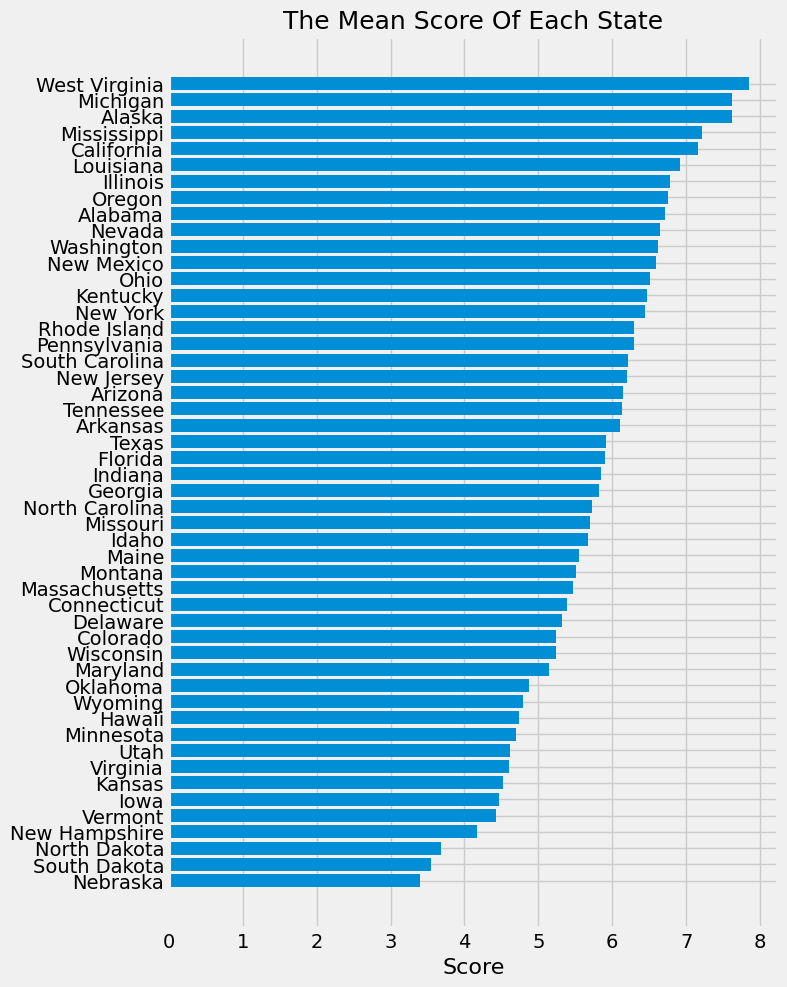

In [26]:
plt.figure(figsize=(7,11))
plt.barh(score_df['States'],score_df['Score'],linewidth=0)
# plt.yticks(rotation=10)
plt.title('The Mean Score Of Each State',fontsize=18)
plt.xlabel('Score',fontsize=16)
# plt.ylabel('States',fontsize=15)
plt.show()

* the state of low salaries is "west virginia" and thats because of high competition in labor market